<a href="https://colab.research.google.com/github/pankaj-hash/HittingTime-of-Q-Triangulation-Graph/blob/main/Karateclube.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import numpy as np
import networkx as nx
#Adjancy matrix
def Graph_to_matrix(Graph):
  return nx.to_numpy_matrix(Graph, list(Graph.nodes))

#Degree matrix
def Degree_matrix(Graph):
  d=[]
  for i in list(Graph.degree):
    d.append(i[1])
  return np.diag(d)

def Lap_lacian_matrix(A,D):
  P1 = np.matmul(np.sqrt(np.linalg.inv(D)),A)
  return np.matmul(P1,np.sqrt(np.linalg.inv(D)))


def Transition_probability_matrix(A,D):
  return np.matmul(np.linalg.inv(D),A)

def eigens(A):
  return np.linalg.eig(A)

def num_node(G):
  return len(G.nodes)

def Make_empty(n):
  return np.zeros((n,n))

def num_edge(G):
  i=0
  for line in nx.generate_edgelist(G, data=False):
      i+=1
  return i

def Hitting_Time(G):
  m = num_edge(G)
  n = num_node(G)
  A = Graph_to_matrix(G)
  d = Degree_matrix(G)
  L = Lap_lacian_matrix(A,d)
  w,v = eigens(L)
  T = Make_empty(n)
  for i in range(n):
      for j in range(n):
          for k in range(1,n):
              T[i,j]+=(1/(1-w[k]))*(((v[j,k]**2)/d[j,j])-(v[i,k]*v[j,k])/np.sqrt(d[i,i]*d[j,j]))*2*m
  return T

def Kemini_Const(G,w):
  n = num_node(G)
  k=0
  for i in range(1,n):
      k+=(1/(1-w[i]))
  return k

def Make_q_triangular(G,q):
  i=0
  H = G.copy()
  for e in list(G.edges):
      i+=1
      for j in range(q):
          H.add_edge("x"+str(i),e[1])
          H.add_edge(e[0],"x"+str(i))
          i+=1
  return H

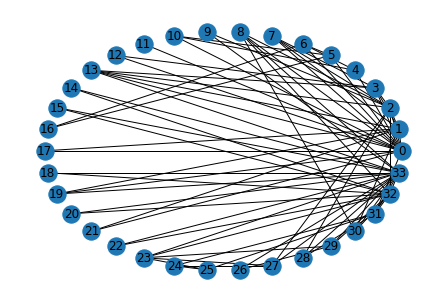

In [86]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.karate_club_graph()

nx.draw_circular(G, with_labels=True)
plt.show()

In [87]:
print(num_edge(G))

78


In [88]:
from networkx.algorithms import bipartite
nx.is_bipartite(G)

False

In [67]:
#for i in Hitting_Time(G):
#  print(i)

In [89]:
A = Graph_to_matrix(G)
d = Degree_matrix(G)
L = Lap_lacian_matrix(A,d)

In [94]:
u,v = np.linalg.eig(L)
H0 = float(Kemini_Const(G,u))
print(H0)

42.88668273940034


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


# Triangulation Graph

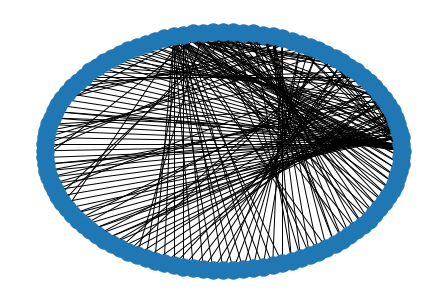

In [99]:
H_1 = Make_q_triangular(G,1)
nx.draw_circular(H_1)

In [100]:
A = Graph_to_matrix(H_1)
d = Degree_matrix(H_1)
print(d.shape)
L = Lap_lacian_matrix(A,d)
u,v = np.linalg.eig(L)
H1 = float(Kemini_Const(H_1,u))
print(H1)

(112, 112)
152.44003214546694


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  


# 2-Triangulationgraph

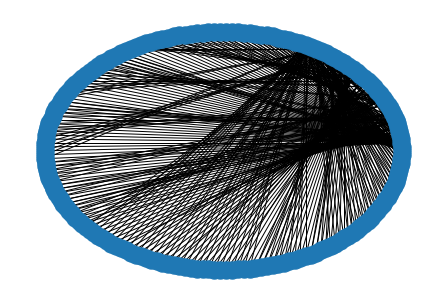

In [103]:
H_2 = Make_q_triangular(G,2)
nx.draw_circular(H_2)

In [105]:
A = Graph_to_matrix(H_2)
d = Degree_matrix(H_2)
print(d.shape)
L = Lap_lacian_matrix(A,d)
u,v = np.linalg.eig(L)
H2 = float(Kemini_Const(H_2,u))
print(H2)

(190, 190)
246.31670684850098


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  


# 3-TriangulationGraph

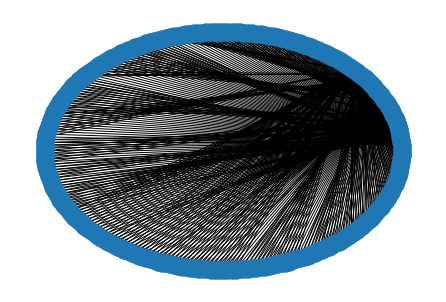

In [106]:
H_3 = Make_q_triangular(G,3)
nx.draw_circular(H_3)

In [109]:
A = Graph_to_matrix(H_3)
d = Degree_matrix(H_3)
print(d.shape)
L = Lap_lacian_matrix(A,d)
u,v = np.linalg.eig(L)
H3 = float(Kemini_Const(H_3,u))
print(H3)

(268, 268)
300239975158366.4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  


# 4-TriangulationGraph

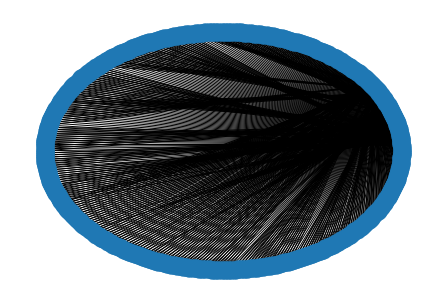

In [110]:
H_4 = Make_q_triangular(G,4)
nx.draw_circular(H_4)

In [113]:
A = Graph_to_matrix(H_4)
d = Degree_matrix(H_4)
print(d.shape)
L = Lap_lacian_matrix(A,d)
u,v = np.linalg.eig(L)
H4 = float(Kemini_Const(H_4,u))
print(H4)

(346, 346)
418.2156037737564


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  


# 5-TriangulationGraph

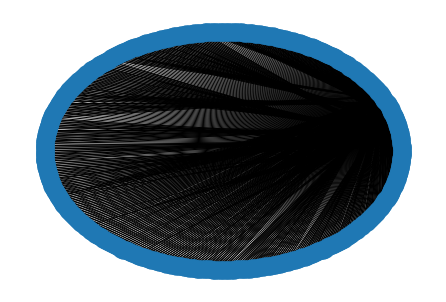

In [114]:
H_5 = Make_q_triangular(G,5)
nx.draw_circular(H_5)


In [116]:
A = Graph_to_matrix(H_5)
d = Degree_matrix(H_5)
print(d.shape)
L = Lap_lacian_matrix(A,d)
u,v = np.linalg.eig(L)
H5 = float(Kemini_Const(H_5,u))
print(H5)

(424, 424)
500.7607431550034


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  


# q vs keminiconstant Graph

In [117]:
import matplotlib.pyplot as plt
import numpy as np
x = np.array([0,1,2,3,4,5])
y = np.array([H0,H1,H2,H3,H4,H5])

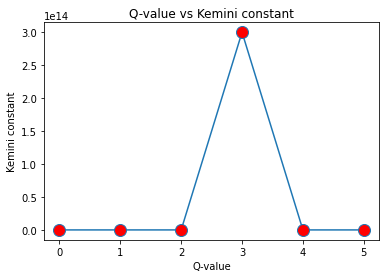

In [123]:
plt.plot(x,y,marker="o",markerfacecolor='red',markersize=12)
plt.xlabel("Q-value")
plt.ylabel("Kemini constant")
plt.title("Q-value vs Kemini constant")
plt.show()

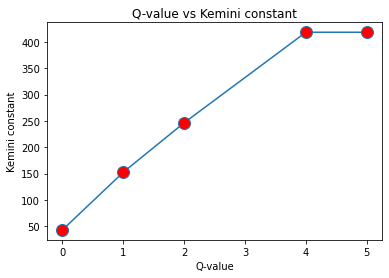

In [124]:
x = np.array([0,1,2,4,5])
y = np.array([H0,H1,H2,H4,H4])
plt.plot(x,y,marker="o",markerfacecolor='red',markersize=12)
plt.xlabel("Q-value")
plt.ylabel("Kemini constant")
plt.title("Q-value vs Kemini constant")
plt.show()